In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats

In [2]:
file_name = './水質資料.xlsx'
df = pd.read_excel(file_name, index_col=0)

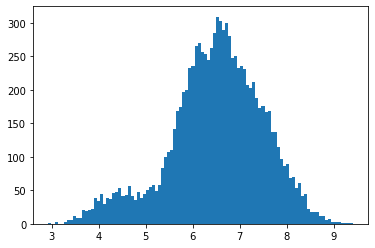

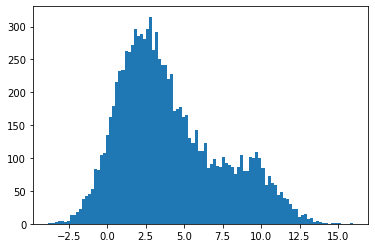

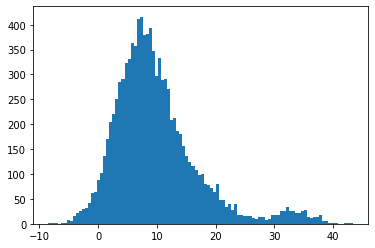

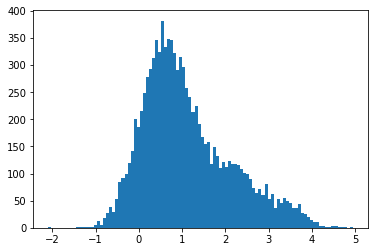

In [3]:
bufferDict = {}
for val in df.columns.values:
    samplePDF = scipy.stats.gaussian_kde(df[val].values[:-1])
    fakedata = samplePDF.resample(10000).T[:,0]
    bufferDict[val] = fakedata
    plt.hist(fakedata, bins=100)
    plt.show()

In [4]:
bufferDict

{'DO': array([6.14951354, 5.91328508, 4.90680349, ..., 6.19906295, 7.80807624,
        6.82915547]),
 'BOD': array([1.78005375, 8.02362898, 4.02590584, ..., 2.59771834, 3.99100839,
        5.8487697 ]),
 'SS': array([19.55597812,  7.24978976, 30.6885325 , ...,  1.18295931,
        10.65722102,  1.00200724]),
 'Nitrogen': array([1.11945416, 3.51114917, 1.20321373, ..., 1.17225899, 2.07696608,
        3.9538829 ])}

In [5]:
simulation_pdf = []

for val in df.columns.values:
    simulation_pdf.append(scipy.stats.gaussian_kde(df[val].values[:-1]))

In [6]:
simulation_pdf[0].resample(1).T[:,0]

array([5.62282226])

In [13]:
import joblib
for i in range(4):
    joblib.dump(simulation_pdf[i], f'./kde{i}.pkl')

In [28]:
for i in range(4):
    kde = joblib.load(f'./kde{i}.pkl')
    print(kde.resample(1).T[:,0])

[5.9116461]
[-0.45888257]
[10.81839364]
[0.7627076]


In [36]:
import json

sim_data = {}
cols = ['DO', 'BOD', 'SS', 'Nitrogen']
for i in range(4):
    kde = joblib.load(f'./kde{i}.pkl')
    _data = kde.resample(1).T[:,0]
    sim_data[cols[i]] = round(_data[0],2)

In [37]:
sim_data

{'DO': 6.99, 'BOD': 10.85, 'SS': 1.06, 'Nitrogen': 1.83}